<a href="https://colab.research.google.com/github/zahemen9900/British_Airways_Sentiment_Analysis/blob/main/ba_sentiment_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In this phase we will collect the customer ratings data from the airline quality website called [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

sns.set_style("white")
plt.rc("figure", autolayout=True)

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [2]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 32
Error on page 33
Error on page 33


In [3]:
#check the length of total reviews extracted
len(reviews)

3500

In [4]:
len(country)

3500

In [5]:
len(date)

3500

In [6]:
#check the length
stars = stars[:3500]

In [7]:
 #create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews, "stars": stars, "date":date, "country": country})
df.head()

reviews  \
0  Not Verified |  \nWe traveled to Lisbon for ou...   
1  ✅ Trip Verified |  Booked a flight from Buchar...   
2  ✅ Trip Verified |  Booked online months ago an...   
3  ✅ Trip Verified |  The flight was on time. The...   
4  Not Verified |  Angry, disappointed, and unsat...   

                           stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  14th November 2023   United States  
1                              1  12th November 2023         Romania  
2                              1   8th November 2023  United Kingdom  
3                              8   7th November 2023  United Kingdom  
4                              7   5th November 2023           Italy

In [8]:
df.shape

(3500, 4)

## **Data Cleaning**
---

Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [9]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re #for regular expressions

In [10]:
df.head()

reviews  \
0  Not Verified |  \nWe traveled to Lisbon for ou...   
1  ✅ Trip Verified |  Booked a flight from Buchar...   
2  ✅ Trip Verified |  Booked online months ago an...   
3  ✅ Trip Verified |  The flight was on time. The...   
4  Not Verified |  Angry, disappointed, and unsat...   

                           stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  14th November 2023   United States  
1                              1  12th November 2023         Romania  
2                              1   8th November 2023  United Kingdom  
3                              8   7th November 2023  United Kingdom  
4                              7   5th November 2023           Italy

We will also create a column which mentions if the user is verified or not.

In [11]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [12]:
df['verified']

0       False
1        True
2        True
3        True
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

### Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus = []

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [15]:
# add the corpus to the original dataframe
df['corpus'] = corpus

In [16]:
df.head()

reviews  \
0  Not Verified |  \nWe traveled to Lisbon for ou...   
1  ✅ Trip Verified |  Booked a flight from Buchar...   
2  ✅ Trip Verified |  Booked online months ago an...   
3  ✅ Trip Verified |  The flight was on time. The...   
4  Not Verified |  Angry, disappointed, and unsat...   

                           stars                date         country  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  14th November 2023   United States   
1                              1  12th November 2023         Romania   
2                              1   8th November 2023  United Kingdom   
3                              8   7th November 2023  United Kingdom   
4                              7   5th November 2023           Italy   

   verified                                             corpus  
0     False  verified traveled lisbon dream vacation cruise...  
1      True  booked flight bucharest manchester h layover h...  
2      True  booked online month ago hitch replacement airc...  
3      True  flight time crew polite story outward flight f...  
4     False  verified angry disappointed unsatisfied route ...

### Cleaning/Formatting date

In [17]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [18]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [19]:
df.date.head()

0   2023-11-14
1   2023-11-12
2   2023-11-08
3   2023-11-07
4   2023-11-05
Name: date, dtype: datetime64[ns]

### Cleaning ratings with stars

In [20]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '8', '7', '2', '3', '6', '4',
       '5', '10', '9', 'None'], dtype=object)

In [21]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df.stars.value_counts()

1       841
2       407
3       391
8       341
10      289
9       286
7       281
5       250
4       239
6       172
None      3
Name: stars, dtype: int64

There are 5 rows having values "None" in the ratings. We will drop all these 5 rows.

In [22]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)
df.stars.unique()

array(['5', '1', '8', '7', '2', '3', '6', '4', '10', '9'], dtype=object)

### Check for null Values

In [23]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3497
dtype: int64

In [24]:
df.country.isnull().value_counts()

False    3497
Name: country, dtype: int64

In [25]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

df.shape

(3497, 6)

In [26]:
#resetting the index
df.reset_index(drop=True)

reviews stars       date  \
0     Not Verified |  \nWe traveled to Lisbon for ou...     5 2023-11-14   
1     ✅ Trip Verified |  Booked a flight from Buchar...     1 2023-11-12   
2     ✅ Trip Verified |  Booked online months ago an...     1 2023-11-08   
3     ✅ Trip Verified |  The flight was on time. The...     8 2023-11-07   
4     Not Verified |  Angry, disappointed, and unsat...     7 2023-11-05   
...                                                 ...   ...        ...   
3492  Great service from LCY-Angers in western Franc...     2 2014-08-06   
3493  06.40 flight 4 August Glasgow to London City c...    10 2014-08-06   
3494  LIS-LHR on 30 July J class on an Airbus 320. I...     3 2014-08-04   
3495  AMS-LCY economy. Embraer aircraft only half-fu...     3 2014-08-02   
3496  Porto-LHR economy. Pushed back late but arrive...     4 2014-08-02   

             country  verified  \
0      United States     False   
1            Romania      True   
2     United Kingdom      True   
3     United Kingdom      True   
4              Italy     False   
...              ...       ...   
3492  United Kingdom     False   
3493  United Kingdom     False   
3494          Canada     False   
3495       Australia     False   
3496       Australia     False   

                                                 corpus  
0     verified traveled lisbon dream vacation cruise...  
1     booked flight bucharest manchester h layover h...  
2     booked online month ago hitch replacement airc...  
3     flight time crew polite story outward flight f...  
4     verified angry disappointed unsatisfied route ...  
...                                                 ...  
3492  great service lcy anger western france embraer...  
3493  flight august glasgow london city cancelled ex...  
3494  li lhr july j class airbus expecting however d...  
3495  am lcy economy embraer aircraft half full time...  
3496  porto lhr economy pushed back late arrived tim...  

[3497 rows x 6 columns]

## _**Exploratory Data Analysis**_

In [27]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS


In [28]:
df = df.reset_index(drop=True)
df.head()

reviews stars       date  \
0  Not Verified |  \nWe traveled to Lisbon for ou...     5 2023-11-14   
1  ✅ Trip Verified |  Booked a flight from Buchar...     1 2023-11-12   
2  ✅ Trip Verified |  Booked online months ago an...     1 2023-11-08   
3  ✅ Trip Verified |  The flight was on time. The...     8 2023-11-07   
4  Not Verified |  Angry, disappointed, and unsat...     7 2023-11-05   

          country  verified                                             corpus  
0   United States     False  verified traveled lisbon dream vacation cruise...  
1         Romania      True  booked flight bucharest manchester h layover h...  
2  United Kingdom      True  booked online month ago hitch replacement airc...  
3  United Kingdom      True  flight time crew polite story outward flight f...  
4           Italy     False  verified angry disappointed unsatisfied route ...

#### What is the average overall rating given for British Airways?

Text(0.5, 1.0, 'Counts for each ratings')

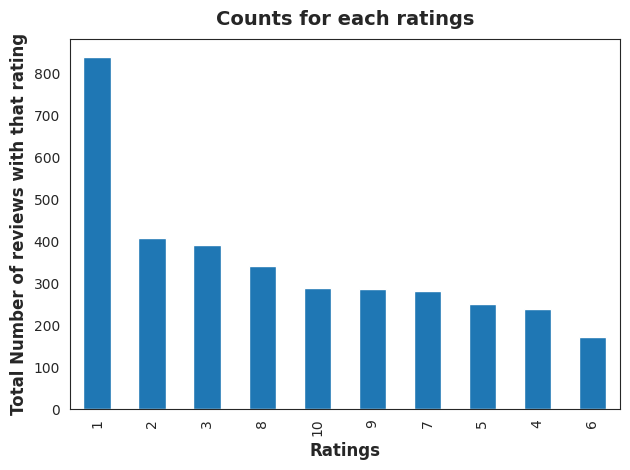

In [29]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")

#### What is the total counts for each ratings?


In [30]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

#### What is the total counts for each ratings?


Text(0.5, 1.0, 'Counts for each ratings')

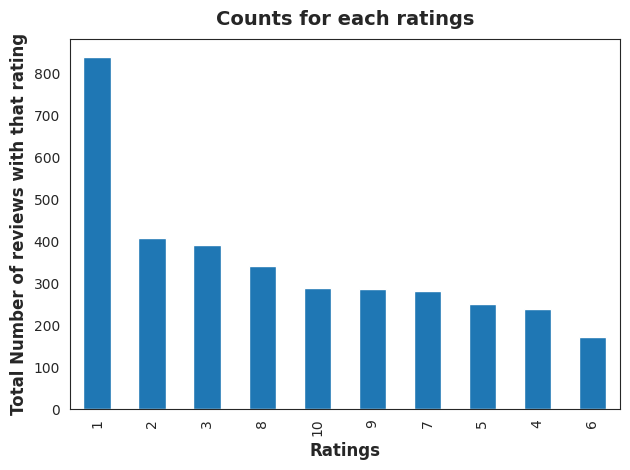

In [31]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")

In [32]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [33]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [34]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [35]:
df_ratings

Stars  total_counts  pct_values
0     1           841       24.05
1     2           407       11.64
2     3           391       11.18
3     8           341        9.75
4    10           289        8.26
5     9           286        8.18
6     7           281        8.04
7     5           250        7.15
8     4           239        6.83
9     6           172        4.92

Text(0.5, 1.0, 'Counts for each ratings')

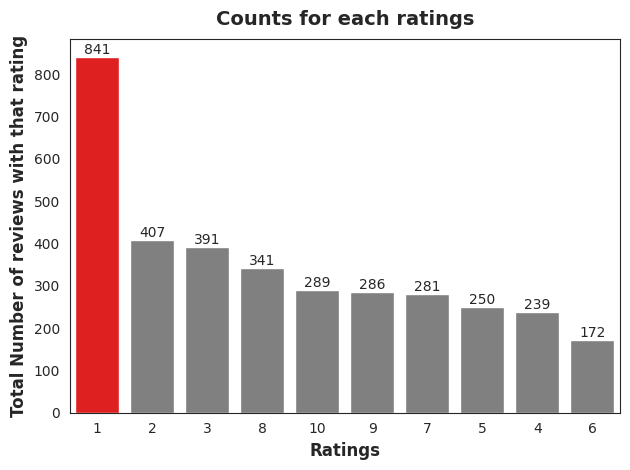

In [36]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


In [37]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


#### Which country most review comes from?  

In [38]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [39]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [40]:
df_country_review.head()

country  total_reviews
0  United Kingdom           2187
1   United States            399
2       Australia            147
3          Canada            107
4         Germany             63

Text(0.5, 1.0, 'Maximum number of review by country')

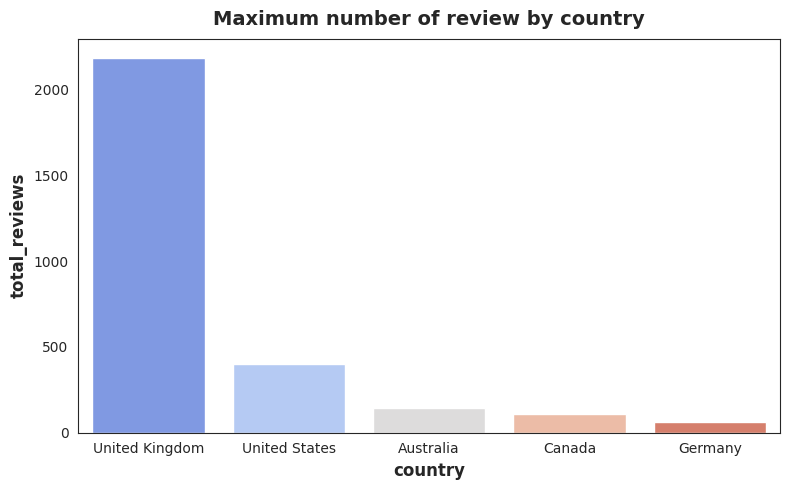

In [41]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_country_review, y = 'total_reviews', x = 'country', palette = 'coolwarm')
plt.title("Maximum number of review by country")

In [42]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].unique().reset_index())
df_country_rating.head()

country                            stars
0                                      [4, 9]
1  Argentina                 [10, 3, 1, 5, 9]
2  Australia  [4, 1, 2, 3, 9, 7, 8, 10, 5, 6]
3    Austria           [1, 6, 2, 7, 8, 5, 10]
4    Bahrain                              [9]

In [43]:
df_country_rating[df_country_rating['country'] == ''].index

Int64Index([0], dtype='int64')

In [44]:
df_country_rating.drop(0, inplace = True)

In [45]:
df_country_rating['stars'].value_counts()

[1]                                4
[10]                               3
[3]                                2
[8]                                2
[1, 10, 4, 5, 3, 2]                1
                                  ..
[3, 7, 1, 8, 4, 5, 2, 10, 6, 9]    1
[3, 2, 1, 9, 7, 4, 6, 10, 5]       1
[2, 3, 5, 10]                      1
[7, 1, 10, 4, 8, 2, 5, 6, 9, 3]    1
[5]                                1
Name: stars, Length: 62, dtype: int64

In [46]:
def get_mean(array):
  sum = 0
  for number in array:
    sum += int(number)
  return sum / len(array)

df_country_rating['stars'] = df_country_rating['stars'].apply(get_mean)


#### Which country provided on average highest ratings?

In [47]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

df_country_rating.head()

country  avg_rating
1  Argentina    5.600000
2  Australia    5.500000
3    Austria    5.571429
4    Bahrain    9.000000
5    Belgium    5.500000

In [48]:
df_country_rating = df_country_rating.sort_values(by = 'avg_rating', ascending = False)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

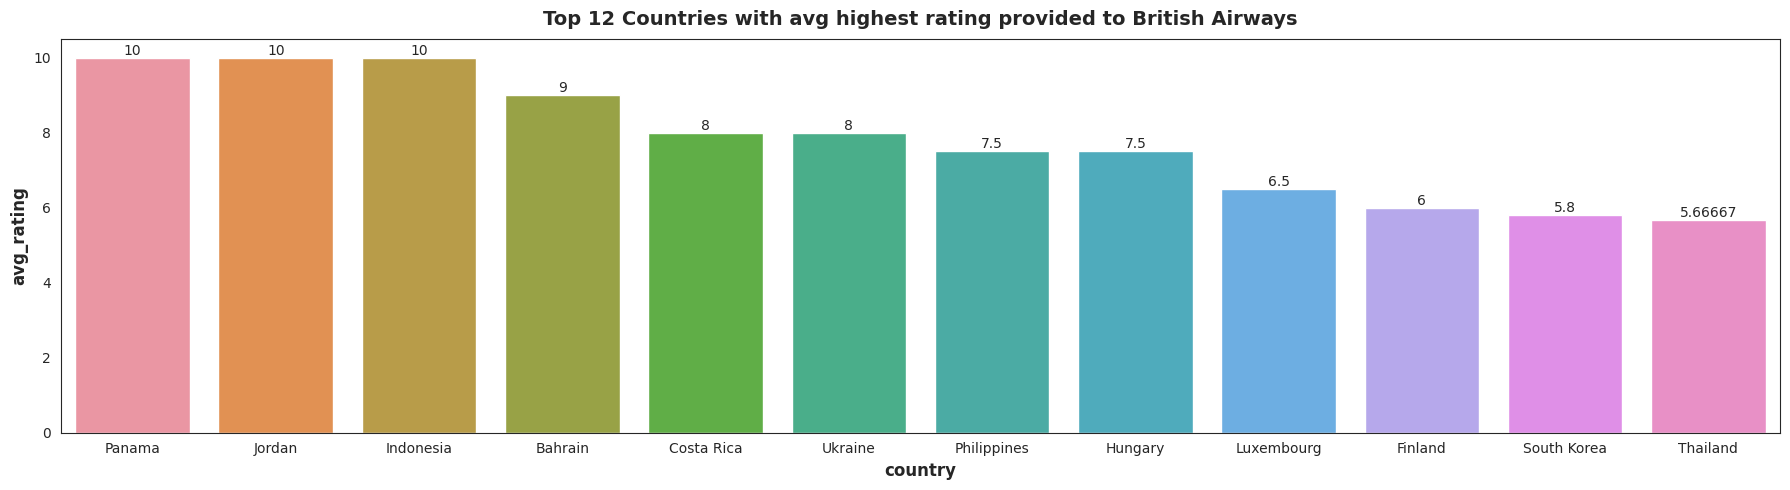

In [49]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating.iloc[:12, :])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis

In [50]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [51]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

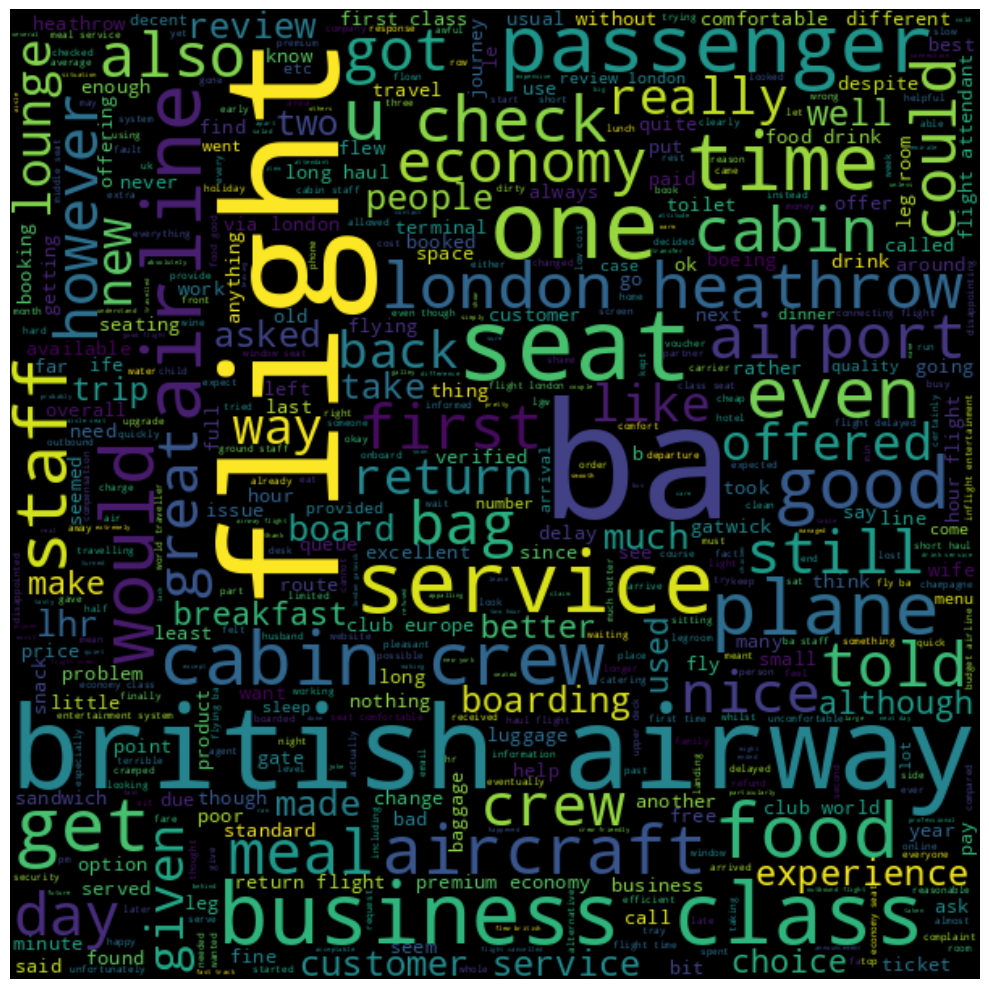

In [52]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.


In [53]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### What is the total counts for each ratings?


In [54]:
df.stars.value_counts().plot(kind="bar", color = 'teal')
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")

Text(0.5, 1.0, 'Counts for each ratings')

In [55]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [56]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [57]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [58]:
df_ratings

Stars  total_counts  pct_values
0     1           841       24.05
1     2           407       11.64
2     3           391       11.18
3     8           341        9.75
4    10           289        8.26
5     9           286        8.18
6     7           281        8.04
7     5           250        7.15
8     4           239        6.83
9     6           172        4.92

Text(0.5, 1.0, 'Counts for each ratings')

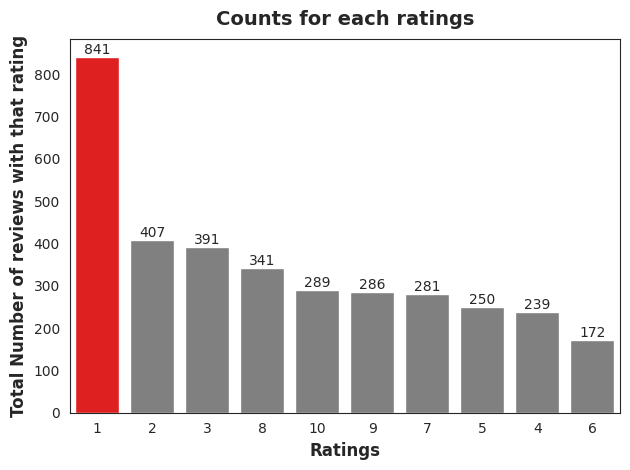

In [59]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


In [60]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


#### Which country most review comes from?  

In [61]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [62]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

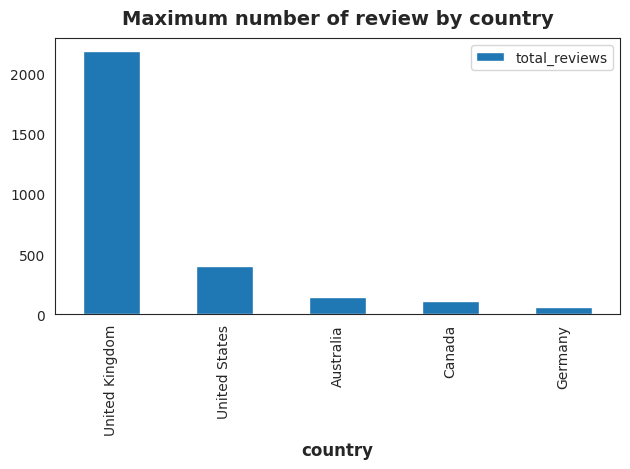

In [63]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

#### Which country provided on average highest ratings?

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

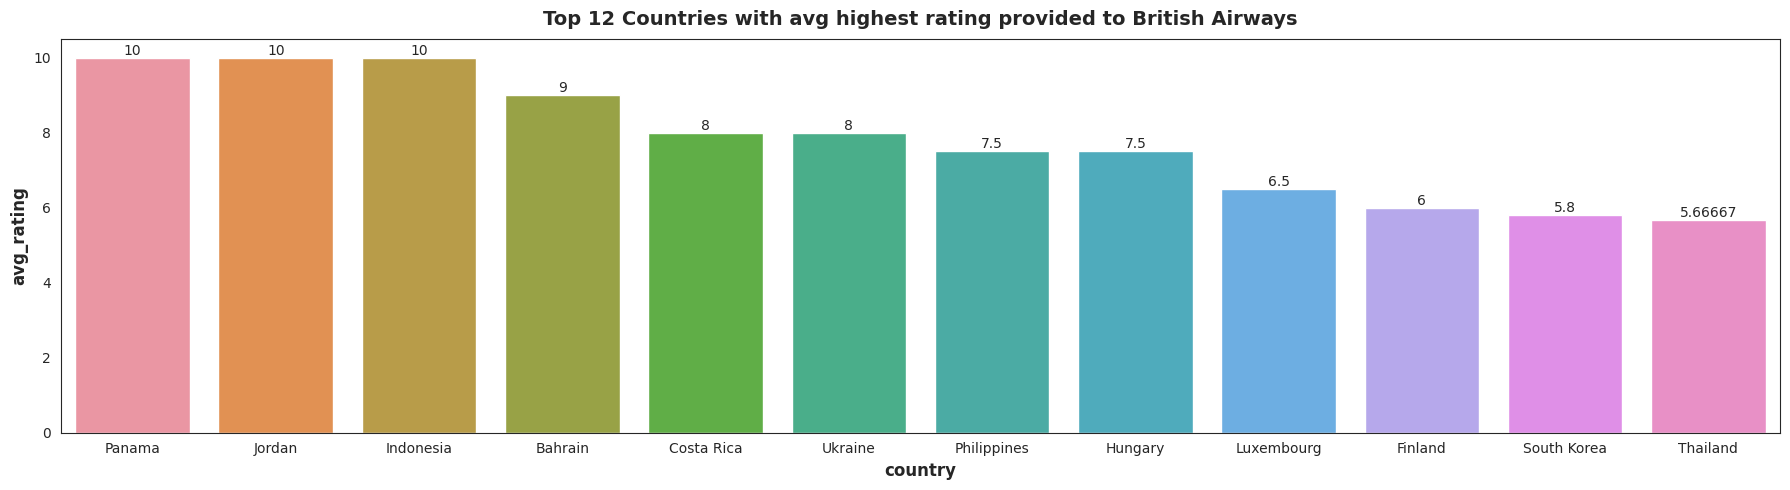

In [64]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis

In [65]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [66]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

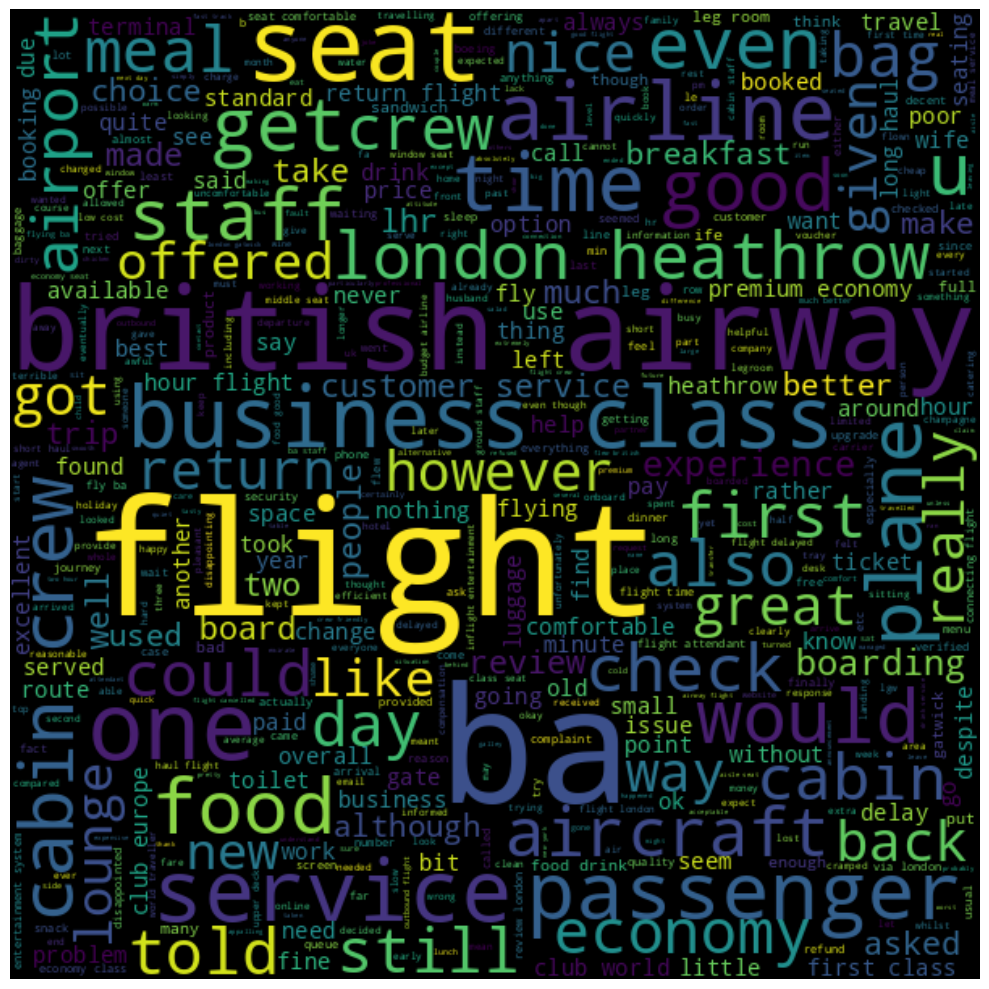

In [67]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.


## Word Frequency

In [68]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

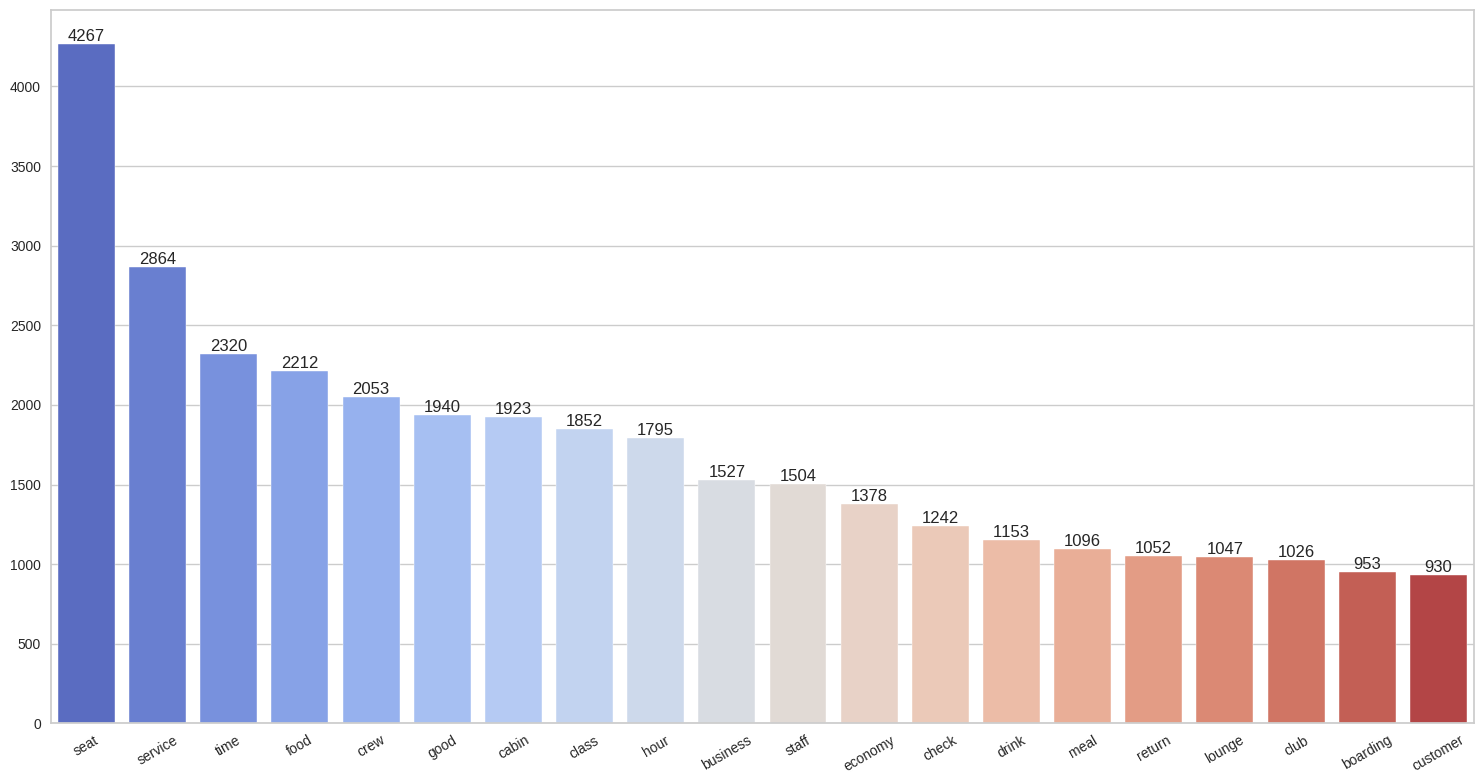

In [153]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette = 'coolwarm')
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

## Word Frequency with N-gram

<Axes: >

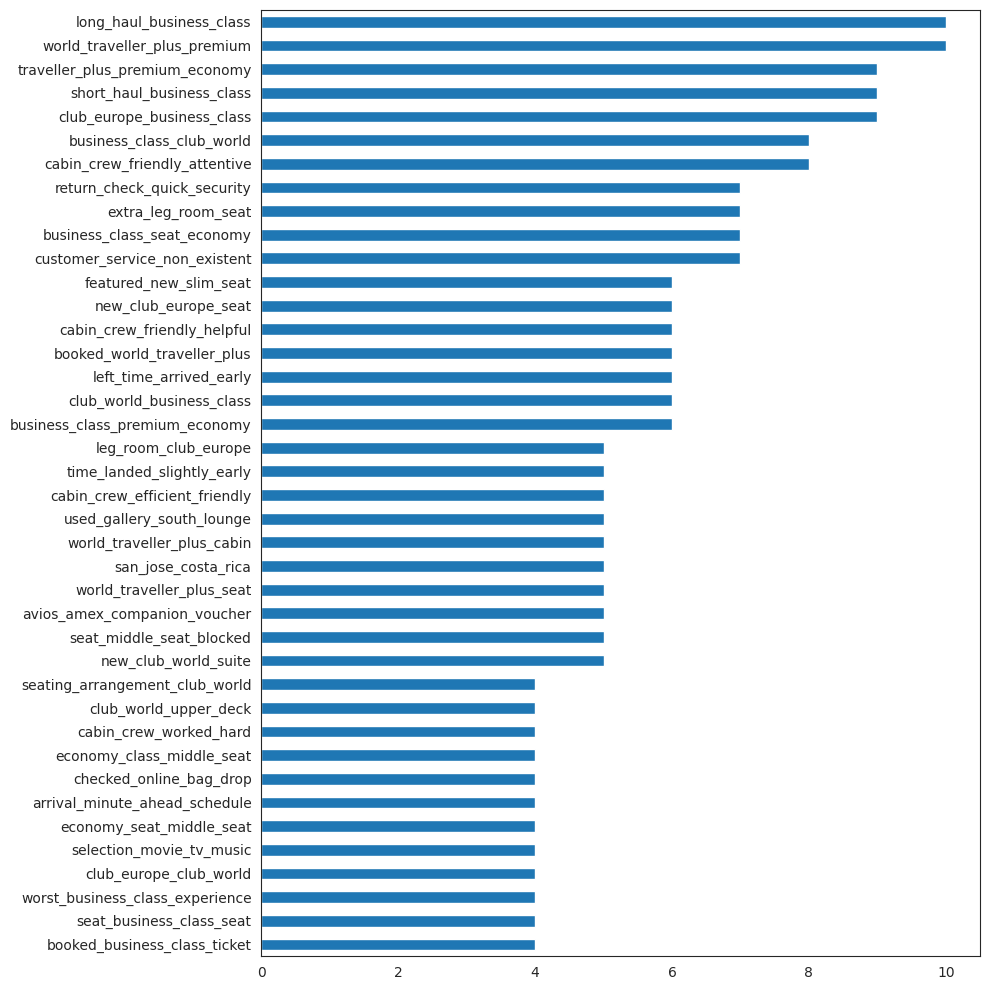

In [70]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngram_list = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngram_list).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

****

Now we will use textblob library to define if the text is negative or positive and to what extent


In [71]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [72]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2376 number of reviews between -0.2 and 0.2 polarity score
1385 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [73]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [75]:
df.label.value_counts()

 1    2218
-1    1158
 0     121
Name: label, dtype: int64

## Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [76]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()


In [77]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [78]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat          2084.1     newcastle             8.3         asked   
1         class          1036.9           far             7.4       service   
2      business           846.8          plus             5.8           tea   
3            ba           713.0          heat             5.8           one   
4         cabin           500.4          burg             5.7        choice   
5         first           390.9          desk             5.7       chicken   
6        flight           381.8            jo             5.6          meal   
7       economy           376.2    experience             5.6        galley   
8        airway           349.2           hey             5.0           ask   
9          crew           348.2       working             4.8      terrible   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0            26.7            ba           807.9        flight          1712.6   
1            25.6       service           621.7       british           845.6   
2            23.3        flight           562.7        airway           834.4   
3            18.6          seat           484.7            ba           800.9   
4            17.5       economy           407.4        london           734.6   
5            15.1          food           357.4       airline           730.2   
6            13.7       airline           320.0          seat           645.3   
7            11.7         class           277.3          food           594.1   
8            10.0          crew           241.6      heathrow           550.8   
9             9.7         cabin           240.8          time           520.5   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight            90.9        flight          2130.7        flight   
1          crew            82.0          good          1402.1            ba   
2       service            77.5          crew          1045.1          hour   
3           bag            77.2            ba           926.5      customer   
4         cabin            67.5          time           883.4          told   
5      boarding            66.9          food           873.3        airway   
6         drink            59.5          seat           853.3       british   
7        london            53.9       service           812.0        london   
8         check            44.1         cabin           802.0          time   
9          full            43.4        lounge           748.8           day   

  Topic 7 weights  
0          2598.1  
1          1495.9  
2           893.4  
3           642.3  
4           621.6  
5           607.3  
6           598.8  
7           597.7  
8           591.4  
9           589.2

There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

## Topic modeling with NMF

In [79]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[2.24765372e-02, 8.74252268e-02],
       [1.96933963e-04, 2.28019588e-01],
       [6.82324989e-02, 5.10127583e-02],
       ...,
       [8.28967953e-02, 1.49405232e-02],
       [8.97881241e-03, 5.99156664e-02],
       [2.28310509e-02, 3.36742307e-02]])

In [80]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [81]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            22.4        flight            22.6
1            ba            12.6            ba             7.6
2         class             9.6          hour             5.2
3          food             7.9          time             4.2
4       service             7.8        london             4.0
5      business             7.6        airway             3.9
6         cabin             7.3       british             3.9
7          good             7.0       service             3.6
8          crew             6.8         would             3.3
9       economy             6.1       airline             2.9

With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.

# _**Exploratory Data Analysis on Customer Bookings data for British Airways**_

We will explore the customer data first to get to know it better in depth.


In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df_c = pd.read_csv('/content/drive/MyDrive/customer_booking.csv', encoding = 'ISO-8859-1')

In [84]:
df_c.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [85]:
df_c.shape

(50000, 14)

In [86]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Sales Channel

In [87]:
per_internet = df_c['sales_channel'].value_counts().values[0]  / df_c.sales_channel.count() *100
per_mobile = df_c.sales_channel.value_counts().values[1]  / df_c.sales_channel.count() *100

In [88]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


### Trip Type

In [89]:
per_round = df_c.trip_type.value_counts().values[0]/ df_c.trip_type.count() *100
per_oneway = df_c.trip_type.value_counts().values[1]/ df_c.trip_type.count() *100
per_circle = df_c.trip_type.value_counts().values[2]/ df_c.trip_type.count() *100

In [90]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")


Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


<Axes: xlabel='purchase_lead', ylabel='Count'>

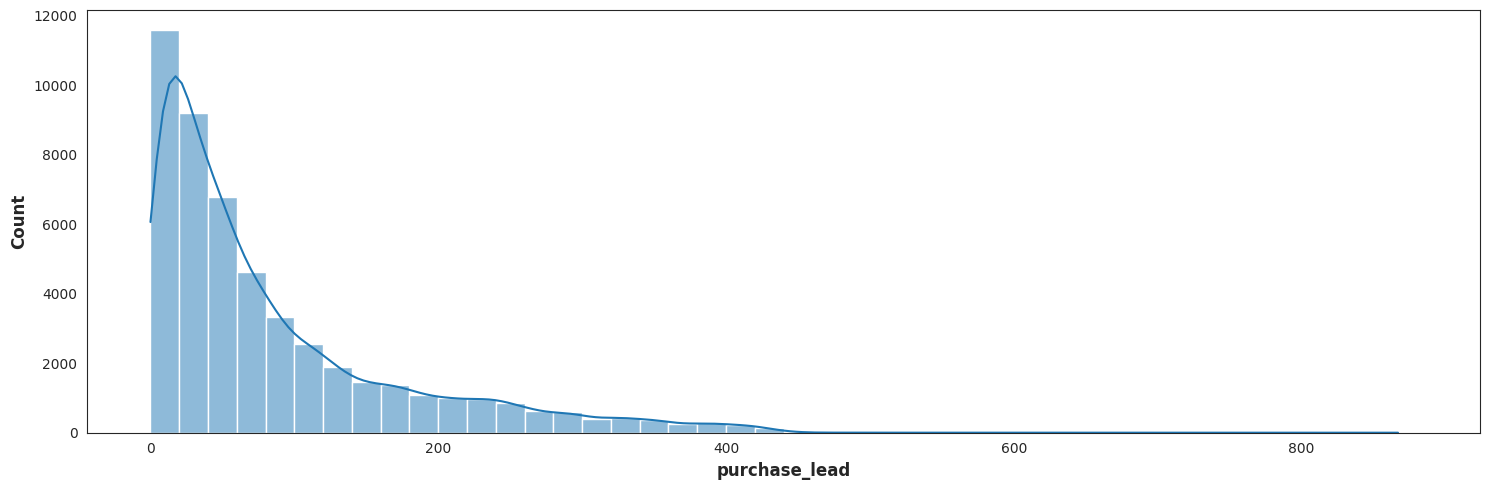

In [91]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_c, x="purchase_lead", binwidth=20,kde=True)

There are few bookings that were done more than 2 years before the travel date and it seems very unlikely that book that in advance. However, it might also be because of the cancellation and rebooking in a period of 6 months for twice. Generally airline keep the tickets for rebooking within a year. But at this point we will consider them as outliers which will effect the results of predictive model in a huge way.

In [92]:
(df_c.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [93]:
df_c[df_c.purchase_lead > 600]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
835                 3      Internet  RoundTrip            641              46   
6148                1      Internet  RoundTrip            614              19   
24119               1      Internet  RoundTrip            704              23   
38356               2      Internet  RoundTrip            633               5   
39417               1        Mobile  RoundTrip            625               5   
42916               1        Mobile  RoundTrip            605               6   
46716               2      Internet  RoundTrip            606               6   
48259               3      Internet  RoundTrip            867               6   

       flight_hour flight_day   route   booking_origin  wants_extra_baggage  \
835              6        Sun  AKLKUL         Malaysia                    1   
6148            11        Wed  COKMEL        Australia                    0   
24119            8        Tue  PNHSYD        Australia                    0   
38356           10        Sat  HKTOOL        Australia                    0   
39417           15        Fri  ICNRGN  Myanmar (Burma)                    0   
42916           18        Thu  BLRMEL            India                    0   
46716            6        Fri  HKTTPE    United States                    0   
48259            7        Mon  KIXMLE            Japan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
835                       0                      1             8.83   
6148                      0                      0             8.83   
24119                     0                      0             8.58   
38356                     0                      1             8.83   
39417                     0                      0             6.62   
42916                     0                      0             8.83   
46716                     0                      1             4.67   
48259                     0                      1             7.00   

       booking_complete  
835                   1  
6148                  0  
24119                 0  
38356                 0  
39417                 0  
42916                 0  
46716                 0  
48259                 1

In [94]:
#filtering the data to have only purchase lead days less than 600 days
df_c = df_c[df_c.purchase_lead <600 ]

<Axes: xlabel='length_of_stay', ylabel='Count'>

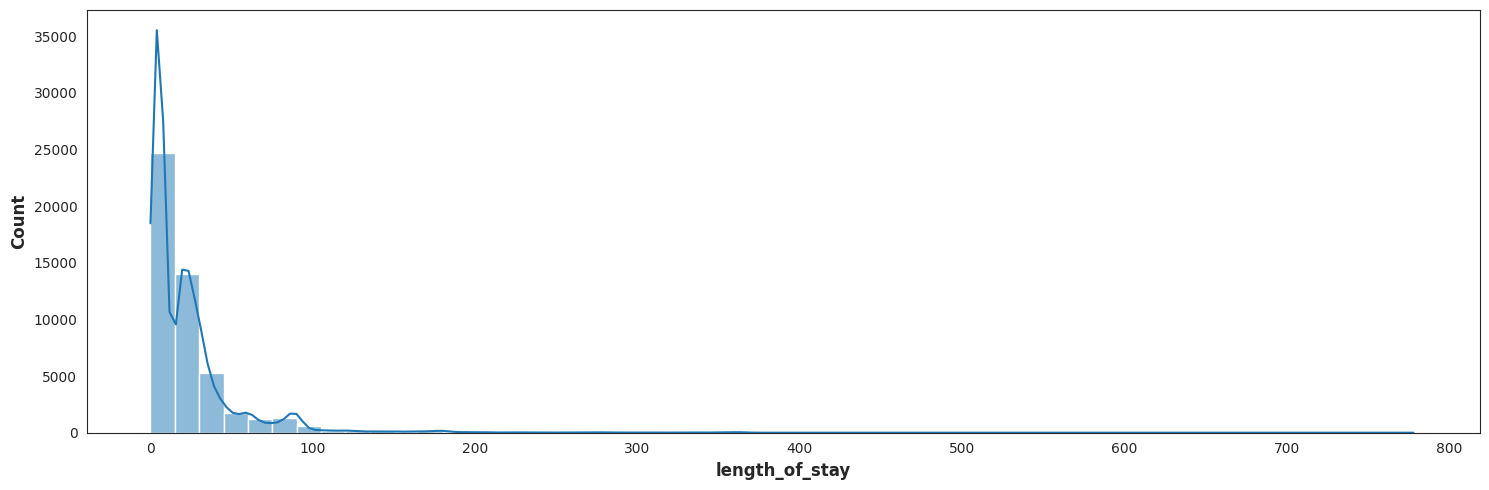

In [95]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_c, x="length_of_stay", binwidth=15,kde=True)

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [96]:
(df_c.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [97]:
df_c[df_c.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [98]:
#filtering the data to have only length of stay days less than 500 days
df_c = df_c[df_c.purchase_lead <500 ]

### Flight Day

We will map the flight day with a number of a week.

In [99]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df_c.flight_day = df_c.flight_day.map(mapping)

<ipython-input-99-4d5d99a750ad>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df_c.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.  

### Booking Origin

Text(0, 0.5, 'Number of bookings')

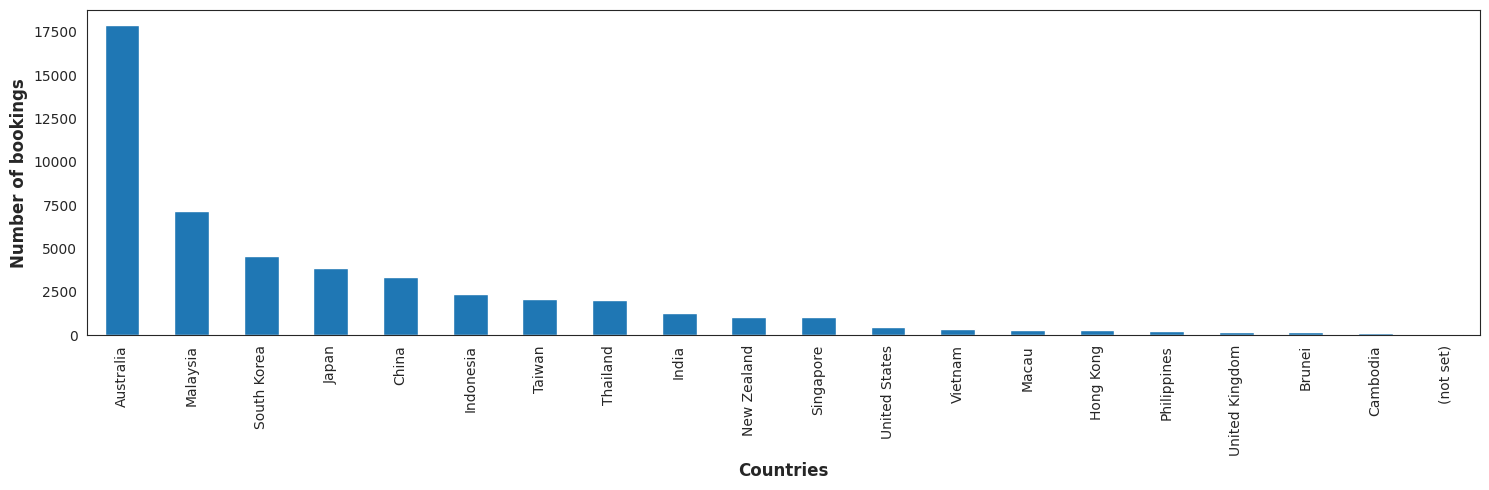

In [101]:
plt.figure(figsize=(15,5))
ax = df_c.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

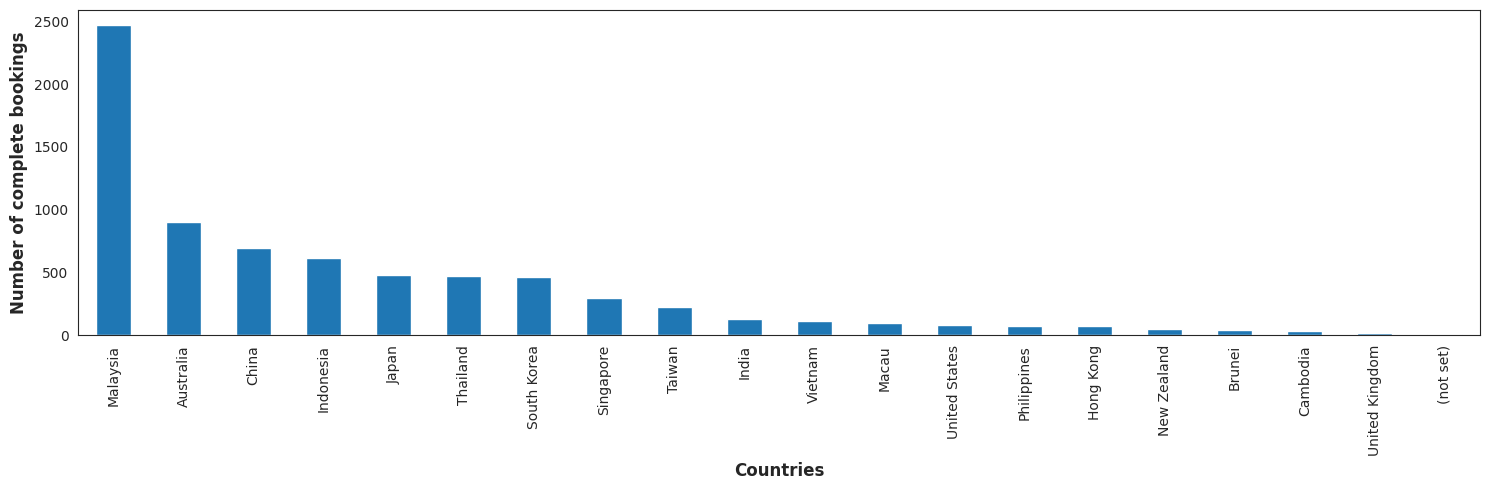

In [102]:
plt.figure(figsize=(15,5))
ax = df_c[df_c.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.  

### Booking complete

In [103]:
successful_booking_per_person = df_c.booking_complete.value_counts().values[0] / len(df_c) * 100
successful_booking_per_person

85.04261534152295

In [104]:
unsuccessful_booking_per_person = 100 - successful_booking_per_person

In [105]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per_person, 2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


# _**Predictive Modelling**_
---

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
df = pd.read_csv("/content/drive/MyDrive/filtered_customer_booking.csv", index_col=0)
df = df.reset_index(drop=True)

In [108]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0            7           6  AKLDEL    New Zealand                    1   
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

We will one hot encode the categorical columns.

In [109]:
df_final = df

In [110]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)



In [111]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [112]:
#store the label for supervised learning
label = df['booking_complete']

In [113]:
df_final = df_final.drop('booking_complete', axis=1)

In [114]:
df_final.head()
dicrete_f = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

In [115]:
for col in df_final.columns:
  print(f"{col} \t\t -> \t\t {', '.join([str(item) for item in df_final[col].unique()])} \n\n")

num_passengers 		 -> 		 2, 1, 3, 4, 6, 5, 7, 9, 8 


purchase_lead 		 -> 		 262, 112, 243, 96, 68, 3, 201, 238, 80, 378, 185, 8, 265, 245, 192, 259, 19, 67, 351, 228, 21, 23, 25, 16, 66, 51, 37, 101, 7, 5, 33, 20, 56, 13, 71, 346, 9, 65, 221, 107, 14, 77, 24, 47, 22, 11, 35, 272, 250, 161, 128, 190, 311, 27, 314, 102, 2, 26, 32, 57, 198, 120, 69, 281, 282, 15, 31, 316, 232, 156, 196, 283, 34, 63, 6, 227, 181, 138, 134, 85, 93, 118, 90, 168, 127, 18, 153, 186, 263, 172, 230, 42, 81, 140, 285, 179, 341, 173, 180, 366, 229, 174, 82, 75, 163, 105, 276, 110, 83, 154, 55, 45, 54, 193, 10, 166, 97, 239, 182, 99, 53, 28, 384, 70, 126, 142, 87, 86, 313, 41, 91, 206, 197, 268, 157, 145, 241, 139, 59, 396, 280, 79, 380, 132, 121, 419, 58, 115, 236, 225, 116, 191, 275, 417, 159, 92, 106, 218, 295, 12, 305, 235, 332, 125, 204, 310, 368, 169, 214, 155, 325, 130, 189, 226, 122, 88, 211, 188, 129, 149, 38, 194, 183, 40, 95, 135, 222, 64, 162, 150, 73, 133, 89, 151, 349, 29, 123, 298, 195, 84, 410, 216

## Normalizaing the values

In [116]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [117]:
#create a dataframe of scaled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [118]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [119]:
scaled_df

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0            0.400769       1.971093       -0.119401    -0.381588    1.096876   
1           -0.579424       0.302987       -0.089895    -1.120618    1.096876   
2            0.400769       1.759799       -0.030885     1.465988   -0.408618   
3           -0.579424       0.125056        0.234662    -0.935861    1.096876   
4            0.400769      -0.186323       -0.030885     1.096473   -0.408618   
...               ...            ...             ...          ...         ...   
49977        0.400769      -0.642272       -0.502969    -0.012073    1.096876   
49978       -0.579424       0.291867       -0.502969    -0.935861    1.598707   
49979       -0.579424      -0.675634       -0.502969     2.389776    1.096876   
49980       -0.579424      -0.775721       -0.502969     0.357443   -1.412280   
49981       -0.579424      -0.731238       -0.502969     0.172685    0.093214   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054              -0.863557   
1                -1.421288             -0.650054              -0.863557   
2                 0.703587              1.538334              -0.863557   
3                -1.421288             -0.650054               1.158002   
4                 0.703587             -0.650054               1.158002   
...                    ...                   ...                    ...   
49977             0.703587             -0.650054               1.158002   
49978            -1.421288             -0.650054              -0.863557   
49979            -1.421288             -0.650054               1.158002   
49980             0.703587             -0.650054               1.158002   
49981            -1.421288              1.538334              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
49977        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49978        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49979        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49980        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49981        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49977      0  
49978      0  
49979      0  
49980      0  
49981      0  

[49982 rows x 15 columns]

## Correlation matrix


<Axes: >

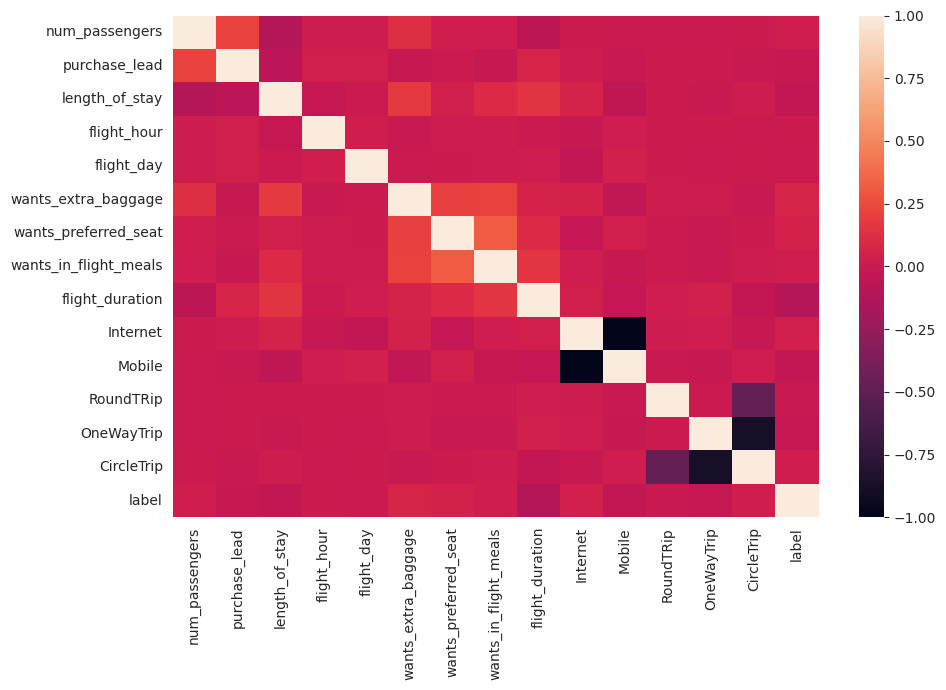

In [120]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

## _Using `mutual_info_regression` to get the most relevant features_

In [121]:
'label' in scaled_df.columns

True

In [122]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_scores(df, target_col):
  """
  gets the mutual information scores of the dataframe's feature columns
  Input :
  df (DataFrame object) -> The DataFrame to be used
  target_col: The column of the prediction target

  Returns:
   mi_score_table (Series Object) -> The mutual info scores for the feature matrix in a sorted dataframe
  """
  X = df.copy()
  y = X.pop(target_col)
  feature_cols = X.columns

  mi_scores = mutual_info_regression(X, y, random_state = 1)
  mi_score_table = pd.DataFrame({'feature_name': feature_cols,'mi_score': mi_scores})
  mi_score_table.sort_values(by = 'mi_score', ascending = False, inplace = True)

  return mi_score_table.reset_index(drop = True)

In [123]:
mi_score_df = get_mi_scores(scaled_df, 'label')
#mi_score_df.rename(columns ={'index': 'feature_name', 0: 'mi_score'}, inplace = True)
mi_score_df

feature_name  mi_score
0         flight_duration  0.022112
1              OneWayTrip  0.007178
2          length_of_stay  0.003513
3     wants_extra_baggage  0.002799
4           purchase_lead  0.001592
5              CircleTrip  0.000824
6                Internet  0.000598
7          num_passengers  0.000000
8             flight_hour  0.000000
9              flight_day  0.000000
10   wants_preferred_seat  0.000000
11  wants_in_flight_meals  0.000000
12                 Mobile  0.000000
13              RoundTRip  0.000000

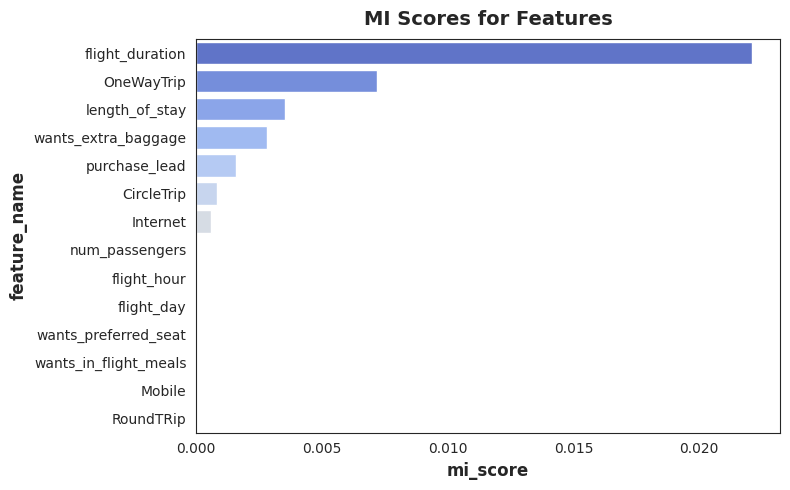

In [124]:
plt.rcParams['axes.titleweight'] = 'bold'

plt.figure(figsize = (8, 5))

sns.barplot(data = mi_score_df, x = 'mi_score', y = 'feature_name', palette = 'coolwarm')
plt.title('MI Scores for Features')
plt.show()

from the mi_score test, we see the most relevant options:
`'flight_duration', 'OneWayTrip', 'length_of_stay', 'wants_extra_baggage', 'purchase_lead', 'CircleTrip', 'Internet'`

Now let's split the dataset into train and test sets.

## Splitting Train and Test Data

In [125]:
from sklearn.model_selection import train_test_split

X = scaled_df.copy()
y = X.pop('label')

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [127]:

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier

In [128]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)


### Checking Training accuracy

In [129]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

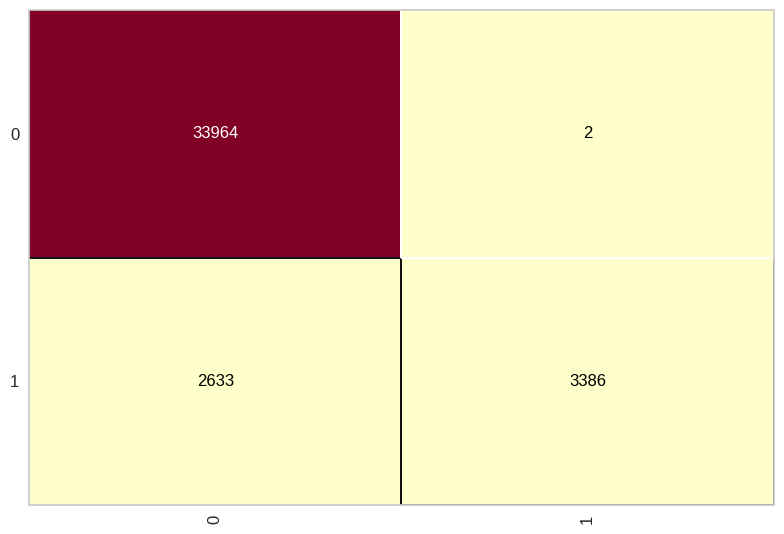

In [130]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

### Checking Testing accuracy

In [131]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

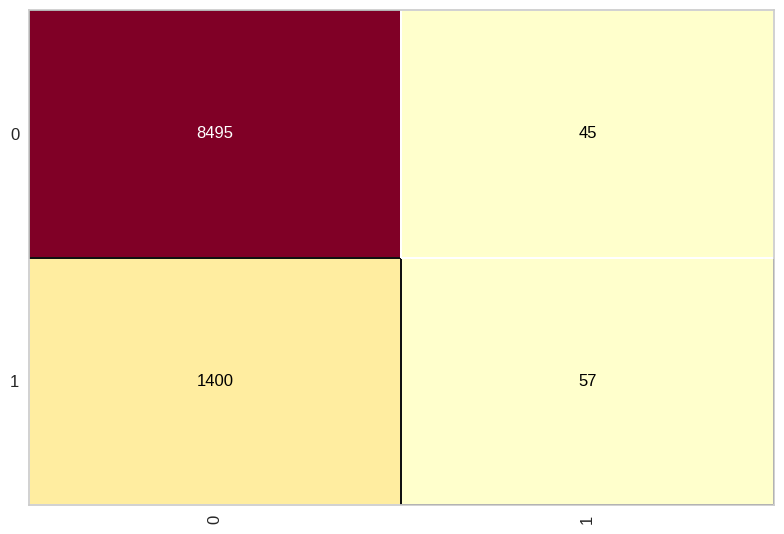

In [132]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

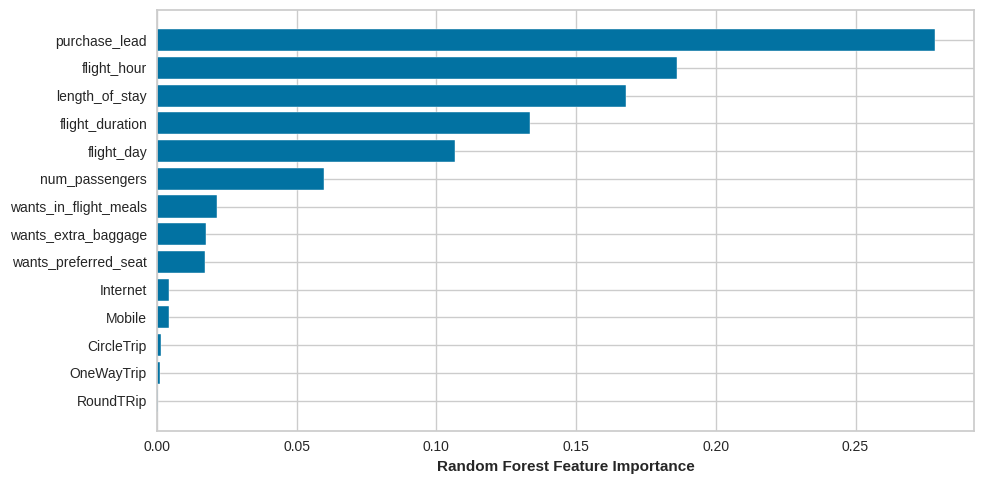

In [133]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

## Balancing the dataset

In [134]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [135]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [136]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [137]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [138]:
scaled_df_new

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           -0.579424      -0.920290       -0.502969     0.357443   -1.412280   
1           -0.579424       1.248247       -0.561979     0.357443   -0.910449   
2            0.400769       0.881264        3.539249     0.542200   -1.412280   
3            2.361155       0.180660       -0.502969    -1.305376   -0.910449   
4            0.400769       0.113935        0.411694    -1.305376   -0.408618   
...               ...            ...             ...          ...         ...   
15471       -0.579424      -0.909169        0.116641    -0.196830    0.093214   
15472       -0.579424      -0.720117        0.352683    -0.566346   -1.412280   
15473       -0.579424       3.105404       -0.001380    -1.305376    1.598707   
15474        0.400769       0.391953       -0.502969     0.911715   -0.910449   
15475       -0.579424      -0.086237       -0.148906     0.357443    1.096876   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587              1.538334               1.158002   
1                 0.703587              1.538334               1.158002   
2                -1.421288             -0.650054               1.158002   
3                 0.703587             -0.650054              -0.863557   
4                 0.703587             -0.650054               1.158002   
...                    ...                   ...                    ...   
15471             0.703587             -0.650054              -0.863557   
15472            -1.421288             -0.650054              -0.863557   
15473             0.703587              1.538334              -0.863557   
15474             0.703587              1.538334               1.158002   
15475            -1.421288              1.538334              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0            -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -0.572772  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
15471        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15472         0.870293  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15473         0.195526  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15474        -1.474687  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15475         1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          1  
2          0  
3          1  
4          0  
...      ...  
15471      0  
15472      0  
15473      1  
15474      1  
15475      0  

[15476 rows x 15 columns]

In [139]:
X = scaled_df_new.copy()
y = X.pop('label')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [141]:
def score_model(model, X_train, y_train, X_test):

  y_pred_test = model_fit_predict(model, X_train, y_train, X_test)

  #f1 score for training data
  f1 = round(f1_score(y_test, y_pred_test),2)

  #accuracy score for training data
  acc = round(accuracy_score(y_test, y_pred_test),2)

  #precision score for training data
  pre = round(precision_score(y_test, y_pred_test),2)

  recall = round(recall_score(y_test, y_pred_test),2)

  specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

  return f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively"


In [142]:
score_model(clf_rf, X_train, y_train, X_test)

'Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.6, 0.65 and 0.61 respectively'

In [143]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.6246770025839793

Text(0.5, 0, 'Random Forest Feature Importance')

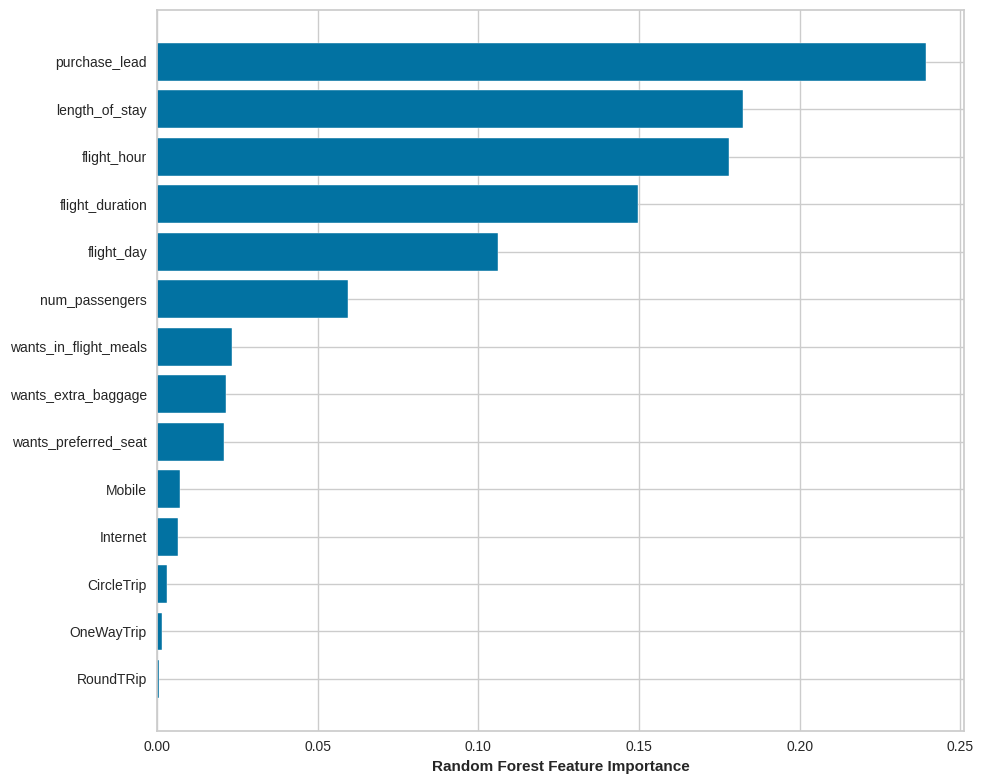

In [144]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Using MI_Scores to train

In [145]:
mi_relevant_cols = ['flight_duration', 'OneWayTrip', 'length_of_stay', 'wants_extra_baggage', 'purchase_lead', 'CircleTrip', 'Internet']

In [146]:
def score_model_mi(model, X, y, X_predict):

  def model_fit_predict_mi(model, X, y, X_predict):
      model.fit(X[mi_relevant_cols], y)

      return model.predict(X_predict[mi_relevant_cols])

  y_pred_test = model_fit_predict_mi(clf_rf, X_train, y_train, X_test)

  #f1 score for training data
  f1 = round(f1_score(y_test, y_pred_test),2)

  #accuracy score for training data
  acc = round(accuracy_score(y_test, y_pred_test),2)

  #precision score for training data
  pre = round(precision_score(y_test, y_pred_test),2)

  recall = round(recall_score(y_test, y_pred_test),2)

  specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

  return f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively"

In [147]:
score_model_mi(clf_rf, X_train, y_train, X_test)

'Accuracy, precision, recall and f1-score for training data are 0.59, 0.58, 0.56, 0.62 and 0.57 respectively'

Without mi_engineering:
```
Accuracy, precision, recall and f1-score for training data are 0.6, 0.6, 0.55, 0.65 and 0.57 respectively
```

With mi_engineering
```
Accuracy, precision, recall and f1-score for training data are 0.59, 0.59, 0.56, 0.62 and 0.58 respectively
```

### Using the `XGBClassifier`

In [148]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 1)


In [149]:
score_model_mi(model_xgb, X_train, y_train, X_test)

'Accuracy, precision, recall and f1-score for training data are 0.59, 0.58, 0.56, 0.62 and 0.57 respectively'

In [150]:
score_model(model_xgb, X_train, y_train, X_test)

'Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.6, 0.65 and 0.61 respectively'

Text(0.5, 0, 'XGB Classifier Feature Importance')

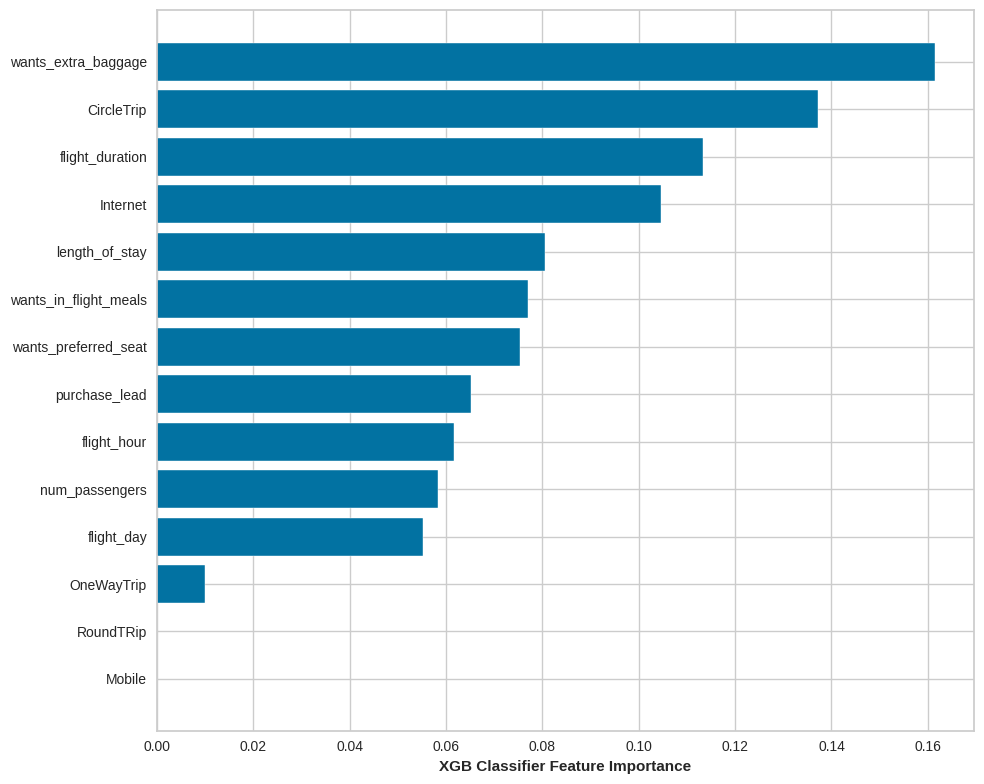

In [151]:
plt.figure(figsize=(10,8))
sorted_idx = model_xgb.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("XGB Classifier Feature Importance")

In [152]:
cm_xgb = ConfusionMatrix(model_xgb, classes=[0,1])
cm.fit(X_train[mi_relevant_cols], y_train)

cm.score(X_test[mi_relevant_cols], y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.5914082687338501

## _**Conclusion**_
---
We see from using the most relevant columns from mutual info scores for training only boosted the recall and the f1 scores, but makes the other parameters less accurate. Hence it's probably better to ignore the mi scores, especially considering the feature importance from the classifiers. The XGBClassifier is also less accurate with the predictions, so the Random Forest Regressor is a better option